## Regressão Linear de Séries Temporais

In [1]:
!pip install python-bcb

In [2]:
from bcb import sgs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
desemprego = sgs.get({'desemprego' : 24369})
desemprego

,desemprego
Date,
2012-03-01,8.0
2012-04-01,7.8
2012-05-01,7.7
2012-06-01,7.6
2012-07-01,7.5
...,...
2025-07-01,5.6
2025-08-01,5.6
2025-09-01,5.6


In [4]:
desemprego.reset_index().set_index('Date')

,desemprego
Date,
2012-03-01,8.0
2012-04-01,7.8
2012-05-01,7.7
2012-06-01,7.6
2012-07-01,7.5
...,...
2025-07-01,5.6
2025-08-01,5.6
2025-09-01,5.6


In [5]:
desemprego.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165 entries, 2012-03-01 to 2025-11-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   desemprego  165 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


<Axes: xlabel='Date'>

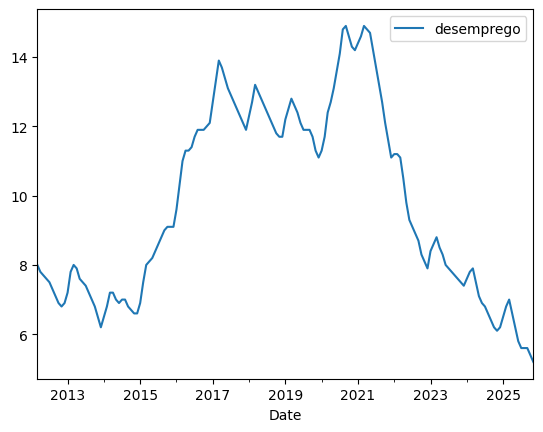

In [6]:
desemprego.plot()

## Exemplo: regressão linear

In [7]:
import statsmodels.api as sm

In [8]:
data = sm.datasets.macrodata.load_pandas().data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    float64
 1   quarter   203 non-null    float64
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(14)
memory usage: 22.3 KB


In [10]:
data.index = pd.PeriodIndex(year = data.year, quarter = data.quarter)

/tmp/ipython-input-1624019934.py:1: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  data.index = pd.PeriodIndex(year = data.year, quarter = data.quarter)


In [11]:
data.index = data.index.to_timestamp()

In [12]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-01-01,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-04-01,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-07-01,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-10-01,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-01-01,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-07-01,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-10-01,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-01-01,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-04-01,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


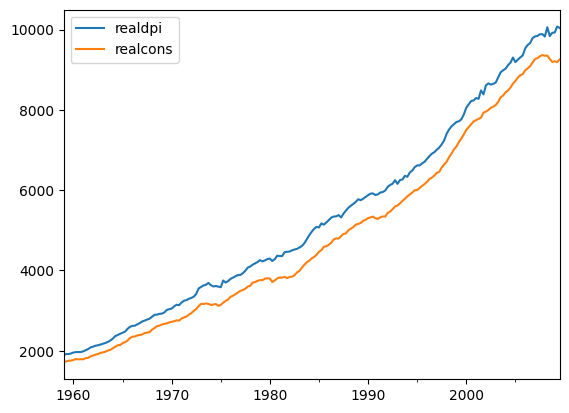

In [13]:
data[['realdpi', 'realcons']].plot();

In [14]:
model1 = sm.OLS.from_formula('realcons ~ realdpi + realdpi.shift(1)', data = data).fit()

model2 = sm.OLS.from_formula('realcons ~realdpi + realcons.shift(1)', data = data).fit()

In [15]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               realcons   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 5.737e+04
Date:                Tue, 13 Jan 2026   Prob (F-statistic):          1.65e-275
Time:                        23:21:18   Log-Likelihood:                -1208.2
No. Observations:                 202   AIC:                             2422.
Df Residuals:                     199   BIC:                             2432.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -236.3591     16.584  

In [16]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               realcons   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.593e+05
Date:                Tue, 13 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:21:18   Log-Likelihood:                -978.41
No. Observations:                 202   AIC:                             1963.
Df Residuals:                     199   BIC:                             1973.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -7.9411      7.60

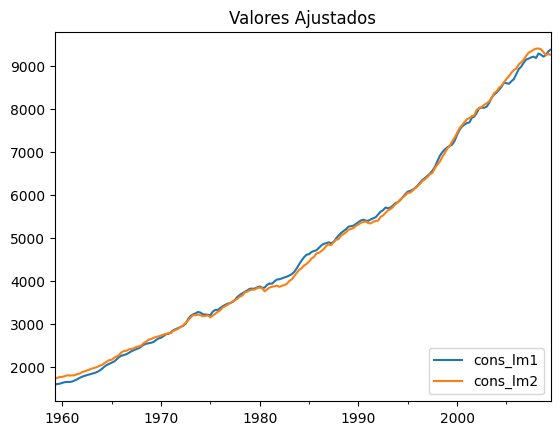

In [17]:
model1.fittedvalues.plot(label = "cons_lm1");
model2.fittedvalues.plot(label = "cons_lm2");
plt.legend(loc='lower right');
plt.title('Valores Ajustados');
plt.show()

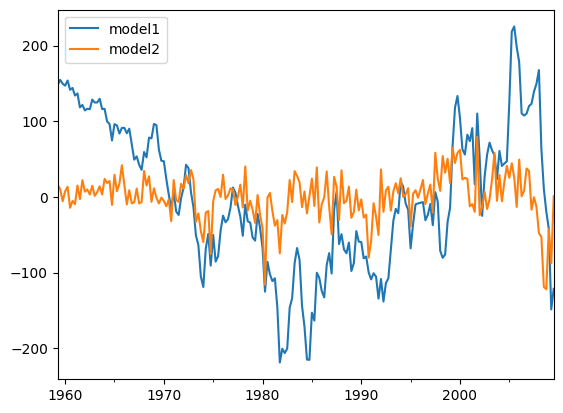

In [18]:
model1.resid.plot(label = 'model1')
model2.resid.plot(label = 'model2')
plt.legend()

In [19]:
from statsmodels.stats.diagnostic import het_breuschpagan # importa módulo para teste BP

# Teste BP automático
bp_cons2 = het_breuschpagan(model2.resid, model2.model.exog)

# Verifica os resultados
# Interpretar os resultados do teste BP
def bp_results(bp_test):
    # Definir um nível de significância (por exemplo, 0.05)
    alpha = 0.05

    # Extrair estatísticas do teste
    lm_statistic, lm_p_value, f_statistic, f_p_value = bp_test

    # Verificar se a hipótese nula é rejeitada
    if lm_p_value < alpha:
        print('\nRejeita-se a hipótese nula:')
        print('Há evidências de heterocedasticidade nos resíduos.')
    else:
        print('\nNão rejeita-se a hipótese nula:')
        print('Não há evidências suficientes de heterocedasticidade nos resíduos.')

In [20]:
from statsmodels.stats.diagnostic import het_white # importa módulo para teste white

# Teste White
white_test = het_white(model1.resid, model1.model.exog)
# Test BP
bp_cons1 = het_breuschpagan(model1.resid, model1.model.exog)

# Interpretar os resultados do teste White
def white_results(white_test):
    # Definir um nível de significância (por exemplo, 0.05)
    alpha = 0.05

    # Extrair estatísticas do teste
    lm_statistic, lm_p_value, f_statistic, f_p_value = white_test

    # Verificar se a hipótese nula é rejeitada
    if lm_p_value < alpha:
        print('\nRejeita-se a hipótese nula:')
        print('Há evidências de heterocedasticidade nos resíduos.')
    else:
        print('\nNão rejeita-se a hipótese nula:')
        print('Não há evidências suficientes de heterocedasticidade nos resíduos.')

bp_results(bp_cons1)
white_results(white_test)


Não rejeita-se a hipótese nula:
Não há evidências suficientes de heterocedasticidade nos resíduos.

Não rejeita-se a hipótese nula:
Não há evidências suficientes de heterocedasticidade nos resíduos.


In [21]:
model1.get_robustcov_results('HAC' , maxlags = 1).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               realcons   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.492e+04
Date:                Tue, 13 Jan 2026   Prob (F-statistic):          1.42e-239
Time:                        23:21:19   Log-Likelihood:                -1208.2
No. Observations:                 202   AIC:                             2422.
Df Residuals:                     199   BIC:                             2432.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -236.3591     24.728     -9.558      0.000    -285.122    -187.596
realdpi              0.5572      0.115      4.827      0.000       0.330       0.785
realdpi.shift(1)     0.3989      0.116      3.440      0.001       0.170       0.627
==============================================================================
Omnibus:                        8.333   Durbin-Watson:                   0.108
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                4.013
Skew:                          -0.018   Prob(JB):                        0.134
Kurtosis:                       2.310   Cond. No.                     2.01e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
[2] The condition number is large, 2.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Resíduos e Teste AR1 de correlação serial
cons_lm2_resid = model2.resid

## Lag 1 dos resíduos
residual_lagged = cons_lm2_resid.shift(1).dropna()

## Estima a regressão (AR1)
model_ar1 = sm.OLS(cons_lm2_resid[1:], sm.add_constant(residual_lagged)).fit()
print(model_ar1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     39.51
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           2.03e-09
Time:                        23:21:19   Log-Likelihood:                -955.73
No. Observations:                 201   AIC:                             1915.
Df Residuals:                     199   BIC:                             1922.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0777      1.992     -0.039      0.9

In [23]:
from statsmodels.stats.stattools import durbin_watson # importa módulo para teste durbin-watson

# Realiza o teste Durbin-Watson nos resíduos do modelo
dw_test = durbin_watson(cons_lm2_resid)

# Interpretação do resultado
if dw_test < 1.5:
    print("Autocorrelação positiva significativa")
elif dw_test > 2.5:
    print("Autocorrelação negativa significativa")
else:
    print("Não há evidências claras de autocorrelação")

Autocorrelação positiva significativa


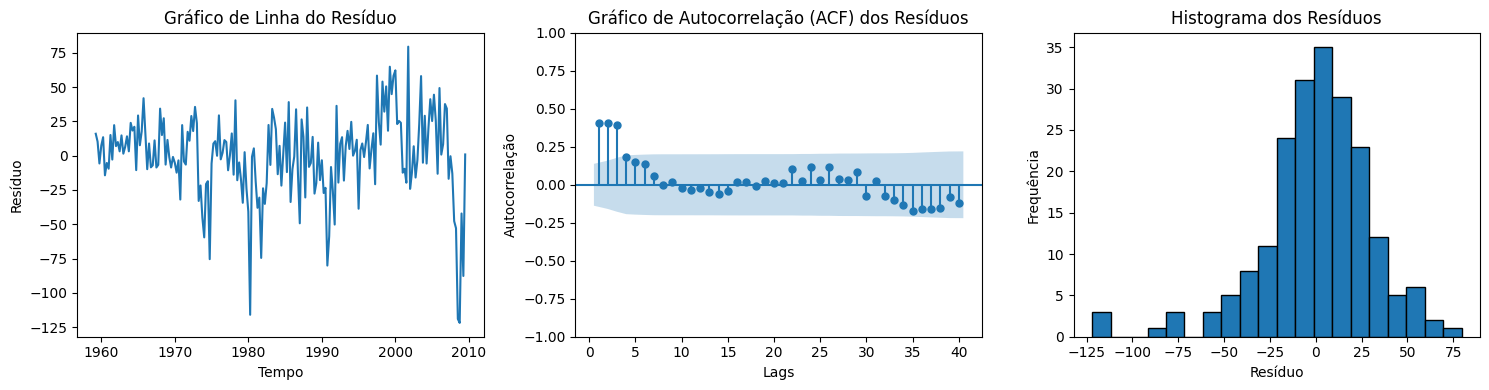

In [24]:
# Cria uma figura com 1 linha e 3 colunas para os três gráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# Gráfico de Linha do Resíduo
axes[0].plot(cons_lm2_resid)
axes[0].set_title('Gráfico de Linha do Resíduo')
axes[0].set_xlabel('Tempo')
axes[0].set_ylabel('Resíduo')

# Gráfico de Autocorrelação (ACF)
sm.graphics.tsa.plot_acf(cons_lm2_resid, lags=40, ax=axes[1], zero = False)
axes[1].set_title('Gráfico de Autocorrelação (ACF) dos Resíduos')
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('Autocorrelação')

# Gráfico de Histograma
axes[2].hist(cons_lm2_resid, bins=20, edgecolor='k')
axes[2].set_title('Histograma dos Resíduos')
axes[2].set_xlabel('Resíduo')
axes[2].set_ylabel('Frequência')

plt.tight_layout()  # Para garantir que os gráficos não se sobreponham
plt.show()